# BurstGPT Timestamp & Arrival Rate Analysis

This notebook analyzes real timestamps from the BurstGPT dataset to understand arrival patterns and traffic characteristics.

In [1]:
# Sort by timestamp and calculate inter-arrival times
df_sorted = df.sort_values('timestamp').reset_index(drop=True)
df_sorted['inter_arrival_time'] = df_sorted['timestamp'].diff()
inter_arrival = df_sorted['inter_arrival_time'].dropna()

print("Inter-Arrival Time Statistics:")
print(f"  Mean: {inter_arrival.mean():.3f}s")
print(f"  Median: {inter_arrival.median():.3f}s")
print(f"  Std Dev: {inter_arrival.std():.3f}s")
print(f"  Min: {inter_arrival.min():.6f}s")
print(f"  Max: {inter_arrival.max():.3f}s")
print(f"\nPercentiles:")
for p in [25, 50, 75, 95, 99]:
    print(f"  P{p}: {inter_arrival.quantile(p/100):.3f}s")

NameError: name 'df' is not defined

In [ ]:
summary = f"""
{'='*80}
BURSTGPT TIMESTAMP & ARRIVAL RATE ANALYSIS
{'='*80}

DATASET: {len(df):,} requests, {df_sorted['timestamp'].max()/3600:.2f} hours

INTER-ARRIVAL TIME:
  Mean: {inter_arrival.mean():.3f}s  |  Median: {inter_arrival.median():.3f}s
  Std: {inter_arrival.std():.3f}s   |  P95: {inter_arrival.quantile(0.95):.3f}s

ARRIVAL RATE (REAL):
  {1/inter_arrival.mean():.6f} req/s | {(1/inter_arrival.mean())*3600:.2f} req/hour

BURSTINESS ({window_size}s windows):
  Mean: {arrival_rates.mean():.6f} req/s  |  Peak: {arrival_rates.max():.6f} req/s
  CV: {arrival_rates.std() / arrival_rates.mean():.2f}  |  Bursts: {100 * num_bursts / len(arrival_rates):.1f}%

RPS SCALING ({rps_scaling}x):
  Real: {df_sorted['timestamp'].max()/3600:.2f}h → Scaled: {df_scaled['timestamp_scaled'].max()/60:.2f}min
  Rate: {1/inter_arrival.mean():.6f} → {1/inter_arrival_scaled.mean():.3f} req/s

KEY INSIGHTS:
  ✓ Real timestamps preserve natural bursty patterns
  ✓ Low baseline rate (~{1/inter_arrival.mean():.4f} req/s)
  ✓ RPS scaling creates artificial high-pressure for testing
  ✓ Real timestamps = realistic benchmarking
  ✓ RPS scaling = finding scheduler breaking points

PLOTS GENERATED:
  1. plots/inter_arrival_time_analysis.png
  2. plots/arrival_rate_over_time.png
  3. plots/real_vs_rps_scaled_comparison.png
{'='*80}
"""

print(summary)

with open('plots/timestamp_analysis_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Summary saved: plots/timestamp_analysis_summary.txt")

## 8. Summary Report

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Real timestamps - cumulative
axes[0, 0].plot(df_sorted['timestamp'] / 3600, np.arange(1, len(df_sorted) + 1), linewidth=2)
axes[0, 0].set_xlabel('Time (hours)')
axes[0, 0].set_ylabel('Cumulative Arrivals')
axes[0, 0].set_title('Real Timestamps: Cumulative Arrivals')
axes[0, 0].grid(True, alpha=0.3)

# RPS-scaled timestamps - cumulative
axes[0, 1].plot(df_scaled['timestamp_scaled'] / 60, np.arange(1, len(df_scaled) + 1), linewidth=2, color='orange')
axes[0, 1].set_xlabel('Time (minutes)')
axes[0, 1].set_ylabel('Cumulative Arrivals')
axes[0, 1].set_title(f'RPS Scaled ({rps_scaling}x): Cumulative Arrivals')
axes[0, 1].grid(True, alpha=0.3)

# Real inter-arrival distribution
axes[1, 0].hist(inter_arrival, bins=100, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Real Timestamps: Inter-Arrival Distribution')
axes[1, 0].grid(True, alpha=0.3)

# RPS-scaled inter-arrival distribution
axes[1, 1].hist(inter_arrival_scaled, bins=100, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'RPS Scaled ({rps_scaling}x): Inter-Arrival Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/real_vs_rps_scaled_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: plots/real_vs_rps_scaled_comparison.png")

In [ ]:
# Simulate RPS scaling
rps_scaling = 200.0
df_scaled = df_sorted.copy()
df_scaled['timestamp_scaled'] = df_scaled['timestamp'] / rps_scaling
df_scaled['inter_arrival_scaled'] = df_scaled['timestamp_scaled'].diff()
inter_arrival_scaled = df_scaled['inter_arrival_scaled'].dropna()

print("Real vs RPS-Scaled Comparison:")
print(f"\nRPS Scaling Factor: {rps_scaling}x")
print(f"\nREAL TIMESTAMPS:")
print(f"  Duration: {df_sorted['timestamp'].max():.2f}s ({df_sorted['timestamp'].max()/3600:.2f} hours)")
print(f"  Avg inter-arrival: {inter_arrival.mean():.3f}s")
print(f"  Avg arrival rate: {1/inter_arrival.mean():.6f} req/s")

print(f"\nRPS-SCALED TIMESTAMPS:")
print(f"  Duration: {df_scaled['timestamp_scaled'].max():.2f}s ({df_scaled['timestamp_scaled'].max()/60:.2f} min)")
print(f"  Avg inter-arrival: {inter_arrival_scaled.mean():.6f}s")
print(f"  Avg arrival rate: {1/inter_arrival_scaled.mean():.3f} req/s")

print(f"\nCOMPRESSION:")
print(f"  Duration: {df_sorted['timestamp'].max() / df_scaled['timestamp_scaled'].max():.1f}x faster")
print(f"  Arrival rate: {(1/inter_arrival_scaled.mean()) / (1/inter_arrival.mean()):.1f}x higher")

## 7. Compare Real Timestamps vs RPS Scaling

In [ ]:
print("Burstiness Analysis:")
print(f"\nArrival Rate Statistics ({window_size}s windows):")
print(f"  Mean: {arrival_rates.mean():.6f} req/s")
print(f"  Std Dev: {arrival_rates.std():.6f} req/s")
print(f"  Min: {arrival_rates.min():.6f} req/s")
print(f"  Max: {arrival_rates.max():.6f} req/s")
print(f"  Coef. of Variation: {arrival_rates.std() / arrival_rates.mean():.2f}")

# Identify burst periods
burst_threshold = arrival_rates.mean() + 2 * arrival_rates.std()
burst_periods = arrival_rates > burst_threshold
num_bursts = burst_periods.sum()
print(f"\nBurst Detection (> mean + 2σ):")
print(f"  Threshold: {burst_threshold:.6f} req/s")
print(f"  Burst periods: {num_bursts}")
print(f"  % Time in burst: {100 * num_bursts / len(arrival_rates):.1f}%")

# Identify quiet periods
quiet_threshold = arrival_rates.mean() - arrival_rates.std()
quiet_periods = arrival_rates < max(0, quiet_threshold)
num_quiet = quiet_periods.sum()
print(f"\nQuiet Period Detection (< mean - σ):")
print(f"  Threshold: {max(0, quiet_threshold):.6f} req/s")
print(f"  Quiet periods: {num_quiet}")
print(f"  % Time quiet: {100 * num_quiet / len(arrival_rates):.1f}%")

## 6. Detect Bursts and Quiet Periods

In [ ]:
# Calculate arrival rate in sliding windows
window_size = 60  # 60 seconds

max_time = df_sorted['timestamp'].max()
time_bins = np.arange(0, max_time + window_size, window_size)
arrival_counts, _ = np.histogram(df_sorted['timestamp'], bins=time_bins)
arrival_rates = arrival_counts / window_size  # requests per second

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Arrival rate over time
time_centers = time_bins[:-1] + window_size / 2
axes[0].plot(time_centers / 3600, arrival_rates, linewidth=1.5, alpha=0.8)
axes[0].axhline(arrival_rates.mean(), color='red', linestyle='--', label=f'Mean: {arrival_rates.mean():.4f} req/s')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Arrival Rate (requests/second)')
axes[0].set_title(f'Arrival Rate Over Time (Window: {window_size}s)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cumulative arrivals
cumulative = np.arange(1, len(df_sorted) + 1)
axes[1].plot(df_sorted['timestamp'] / 3600, cumulative, linewidth=2)
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Cumulative Arrivals')
axes[1].set_title('Cumulative Request Arrivals')
axes[1].grid(True, alpha=0.3)

# Arrival rate distribution
axes[2].hist(arrival_rates, bins=50, edgecolor='black', alpha=0.7)
axes[2].axvline(arrival_rates.mean(), color='red', linestyle='--', label=f'Mean: {arrival_rates.mean():.4f} req/s')
axes[2].axvline(arrival_rates.median(), color='green', linestyle='--', label=f'Median: {arrival_rates.median():.4f} req/s')
axes[2].set_xlabel('Arrival Rate (requests/second)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Arrival Rates')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/arrival_rate_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: plots/arrival_rate_over_time.png")

## 5. Arrival Rate Over Time (Bursty Behavior)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(inter_arrival, bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(inter_arrival.mean(), color='red', linestyle='--', label=f'Mean: {inter_arrival.mean():.3f}s')
axes[0, 0].axvline(inter_arrival.median(), color='green', linestyle='--', label=f'Median: {inter_arrival.median():.3f}s')
axes[0, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Inter-Arrival Time Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Log-scale histogram
axes[0, 1].hist(inter_arrival, bins=100, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Inter-Arrival Time (seconds)')
axes[0, 1].set_ylabel('Frequency (log scale)')
axes[0, 1].set_title('Inter-Arrival Time Distribution (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# CDF
sorted_iat = np.sort(inter_arrival)
cdf = np.arange(1, len(sorted_iat) + 1) / len(sorted_iat)
axes[1, 0].plot(sorted_iat, cdf, linewidth=2)
axes[1, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('Cumulative Distribution Function (CDF)')
axes[1, 0].grid(True, alpha=0.3)

# Box plot
axes[1, 1].boxplot(inter_arrival, vert=True)
axes[1, 1].set_ylabel('Inter-Arrival Time (seconds)')
axes[1, 1].set_title('Inter-Arrival Time Box Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/inter_arrival_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: plots/inter_arrival_time_analysis.png")

## 4. Visualize Inter-Arrival Time Distribution

In [ ]:
# Calculate average arrival rate
avg_rate = 1.0 / inter_arrival.mean()
print(f"\nAverage Arrival Rate:")
print(f"  {avg_rate:.6f} req/s")
print(f"  {avg_rate * 60:.4f} req/min")
print(f"  {avg_rate * 3600:.2f} req/hour")

## 3. Calculate Inter-Arrival Times

In [ ]:
# Basic dataset statistics
print("Dataset Statistics:")
print(f"Total requests: {len(df):,}")
print(f"\nTimestamp range:")
print(f"  Min: {df['timestamp'].min():.2f}s")
print(f"  Max: {df['timestamp'].max():.2f}s")
duration_s = df['timestamp'].max() - df['timestamp'].min()
print(f"  Duration: {duration_s:.2f}s ({duration_s/3600:.2f} hours)")

print(f"\nRequest lengths:")
print(f"  Prompt tokens: {df['prompt_length'].mean():.1f} ± {df['prompt_length'].std():.1f}")
print(f"  Output tokens: {df['output_length'].mean():.1f} ± {df['output_length'].std():.1f}")

In [ ]:
# Load dataset
df = pd.read_csv('data/BurstGPT_sample.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

## 2. Load BurstGPT Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("✓ Libraries loaded successfully")

## 1. Load BurstGPT Dataset

In [2]:
# Load dataset
df = pd.read_csv('data/BurstGPT_sample.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1429737, 6)

Columns: ['Timestamp', 'Model', 'Request tokens', 'Response tokens', 'Total tokens', 'Log Type']

First few rows:


,Timestamp,Model,Request tokens,Response tokens,Total tokens,Log Type
0,5,ChatGPT,472,18,490,Conversation log
1,45,ChatGPT,1087,230,1317,Conversation log
2,118,GPT-4,417,276,693,Conversation log
3,185,ChatGPT,1360,647,2007,Conversation log
4,214,ChatGPT,185,215,400,Conversation log


In [4]:
# Normalize column names
df = df.rename(columns={
    'Timestamp': 'timestamp',
    'Request tokens': 'prompt_length',
    'Response tokens': 'output_length'
})

print("✓ Column names normalized")

✓ Column names normalized


In [5]:
# Basic statistics
print("Dataset Statistics:")
print(f"Total requests: {len(df):,}")
print(f"\nTimestamp range:")
print(f"  Min: {df['timestamp'].min():.2f}s")
print(f"  Max: {df['timestamp'].max():.2f}s")
print(f"  Duration: {(df['timestamp'].max() - df['timestamp'].min()):.2f}s ({(df['timestamp'].max() - df['timestamp'].min())/3600:.2f} hours)")

print(f"\nRequest lengths:")
print(f"  Prompt tokens: {df['prompt_length'].mean():.1f} ± {df['prompt_length'].std():.1f}")
print(f"  Output tokens: {df['output_length'].mean():.1f} ± {df['output_length'].std():.1f}")

Dataset Statistics:
Total requests: 1,429,737

Timestamp range:
  Min: 5.00s
  Max: 5269973.00s
  Duration: 5269968.00s (1463.88 hours)

Request lengths:
  Prompt tokens: 610.6 ± 782.0
  Output tokens: 123.3 ± 268.0


## 2. Calculate Inter-Arrival Times

In [6]:
# Sort by timestamp
df_sorted = df.sort_values('timestamp').reset_index(drop=True)

# Calculate inter-arrival times
df_sorted['inter_arrival_time'] = df_sorted['timestamp'].diff()

# Remove first row (no previous arrival)
inter_arrival = df_sorted['inter_arrival_time'].dropna()

print("Inter-Arrival Time Statistics:")
print(f"  Mean: {inter_arrival.mean():.3f}s")
print(f"  Median: {inter_arrival.median():.3f}s")
print(f"  Std Dev: {inter_arrival.std():.3f}s")
print(f"  Min: {inter_arrival.min():.3f}s")
print(f"  Max: {inter_arrival.max():.3f}s")
print(f"\nPercentiles:")
print(f"  P25: {inter_arrival.quantile(0.25):.3f}s")
print(f"  P50: {inter_arrival.quantile(0.50):.3f}s")
print(f"  P75: {inter_arrival.quantile(0.75):.3f}s")
print(f"  P95: {inter_arrival.quantile(0.95):.3f}s")
print(f"  P99: {inter_arrival.quantile(0.99):.3f}s")

# Calculate average arrival rate
avg_rate = 1.0 / inter_arrival.mean()
print(f"\nAverage Arrival Rate: {avg_rate:.4f} requests/second")
print(f"                      {avg_rate * 60:.2f} requests/minute")
print(f"                      {avg_rate * 3600:.2f} requests/hour")

Inter-Arrival Time Statistics:
  Mean: 3.686s
  Median: 1.000s
  Std Dev: 48.957s
  Min: 0.000s
  Max: 15240.000s

Percentiles:
  P25: 0.000s
  P50: 1.000s
  P75: 1.000s
  P95: 12.000s
  P99: 52.000s

Average Arrival Rate: 0.2713 requests/second
                      16.28 requests/minute
                      976.68 requests/hour


## 3. Visualize Inter-Arrival Time Distribution

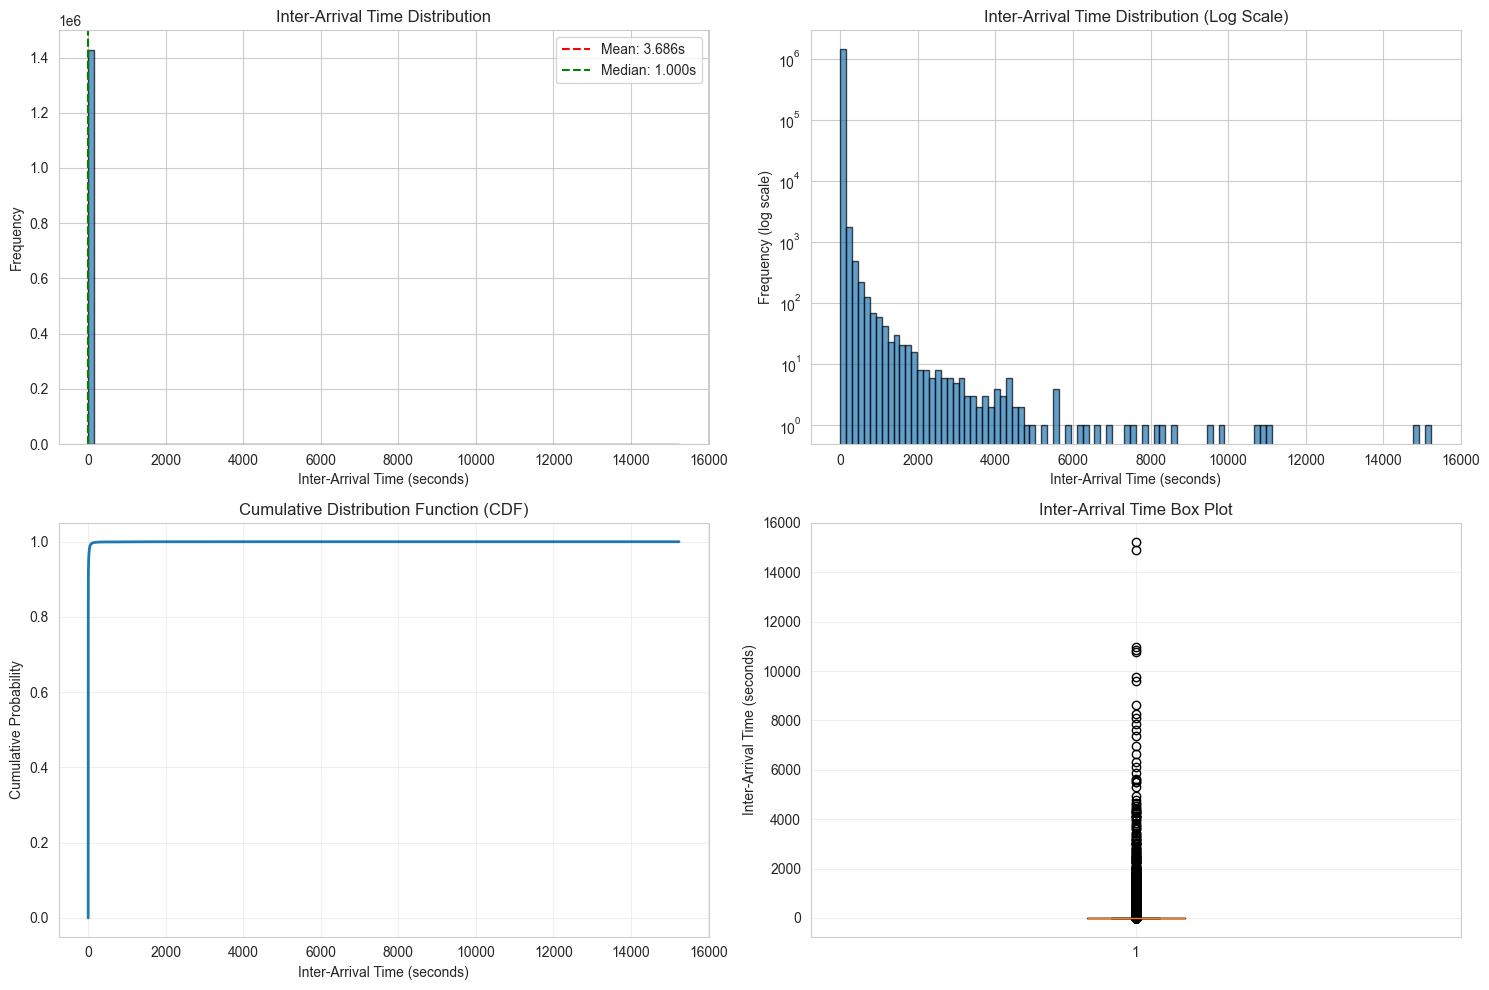

✓ Plot saved to plots/inter_arrival_time_analysis.png


In [7]:
# Plot inter-arrival time distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(inter_arrival, bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Inter-Arrival Time Distribution')
axes[0, 0].axvline(inter_arrival.mean(), color='red', linestyle='--', label=f'Mean: {inter_arrival.mean():.3f}s')
axes[0, 0].axvline(inter_arrival.median(), color='green', linestyle='--', label=f'Median: {inter_arrival.median():.3f}s')
axes[0, 0].legend()

# Log-scale histogram
axes[0, 1].hist(inter_arrival, bins=100, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Inter-Arrival Time (seconds)')
axes[0, 1].set_ylabel('Frequency (log scale)')
axes[0, 1].set_title('Inter-Arrival Time Distribution (Log Scale)')
axes[0, 1].set_yscale('log')

# CDF
sorted_iat = np.sort(inter_arrival)
cdf = np.arange(1, len(sorted_iat) + 1) / len(sorted_iat)
axes[1, 0].plot(sorted_iat, cdf, linewidth=2)
axes[1, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].set_title('Cumulative Distribution Function (CDF)')
axes[1, 0].grid(True, alpha=0.3)

# Box plot
axes[1, 1].boxplot(inter_arrival, vert=True)
axes[1, 1].set_ylabel('Inter-Arrival Time (seconds)')
axes[1, 1].set_title('Inter-Arrival Time Box Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/inter_arrival_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/inter_arrival_time_analysis.png")

## 4. Arrival Rate Over Time (Bursty Behavior)

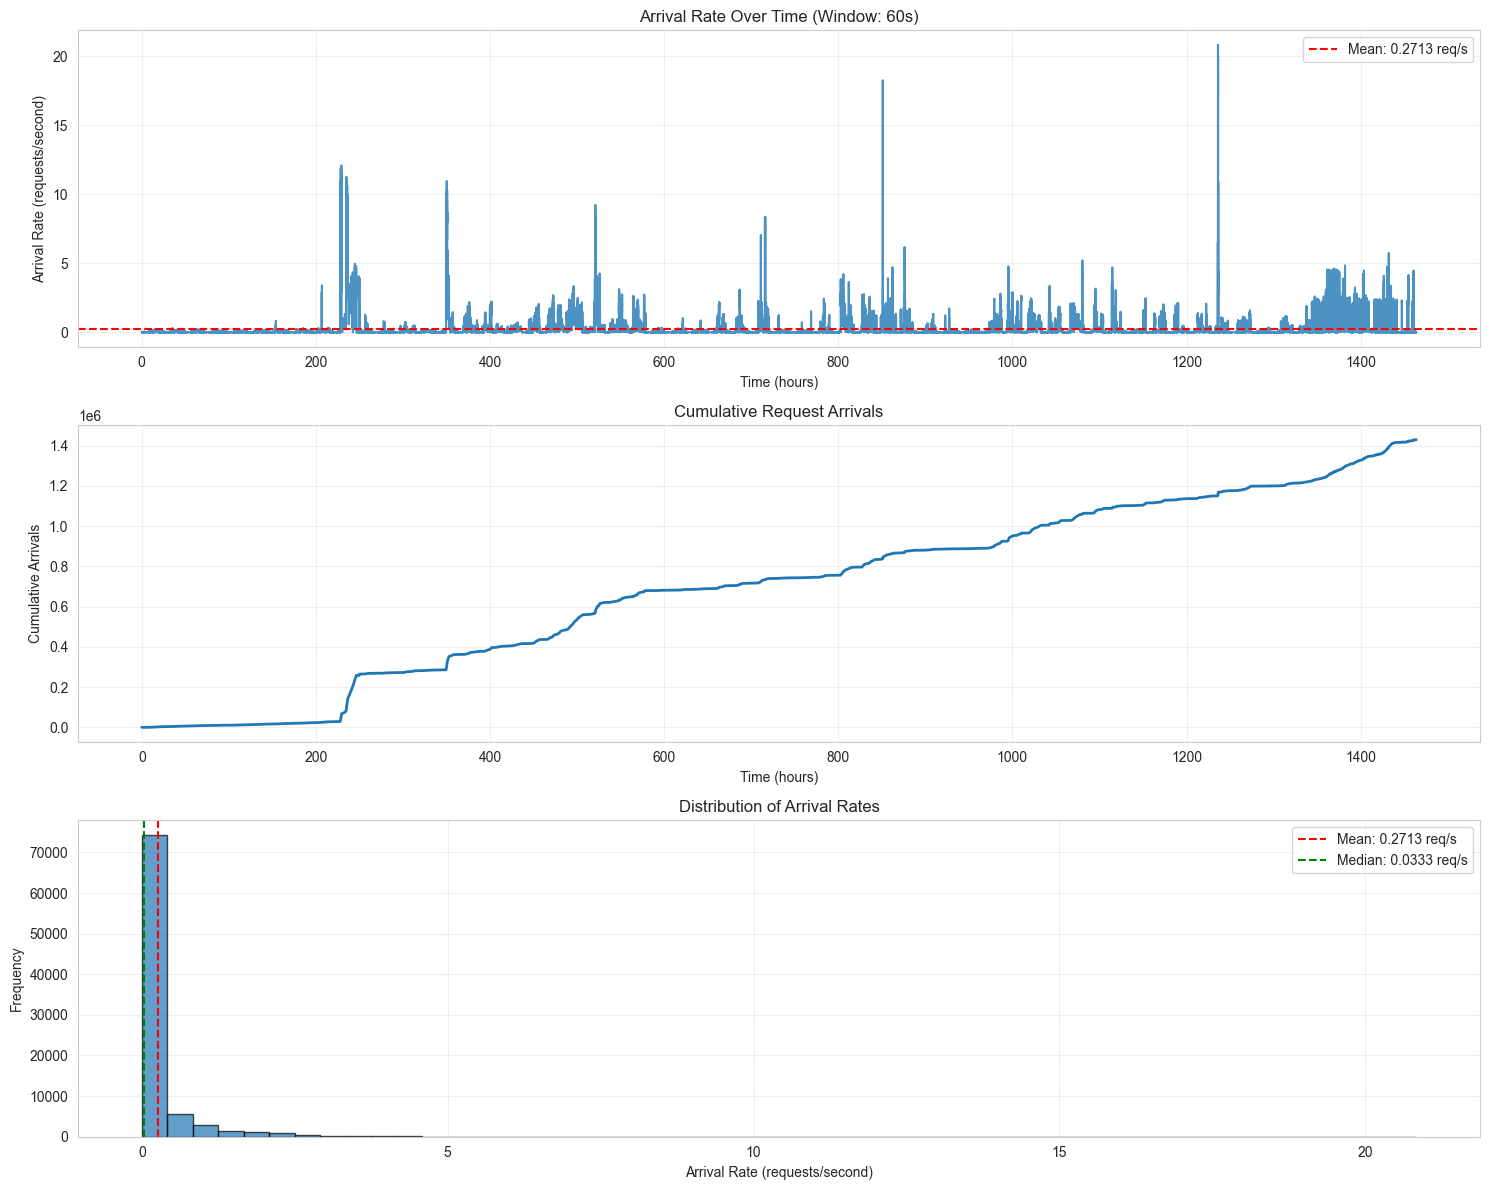

✓ Plot saved to plots/arrival_rate_over_time.png


In [9]:
# Calculate arrival rate in sliding windows
window_size = 60  # 60 seconds

# Create time bins
max_time = df_sorted['timestamp'].max()
time_bins = np.arange(0, max_time + window_size, window_size)

# Count arrivals in each bin
arrival_counts, _ = np.histogram(df_sorted['timestamp'], bins=time_bins)
arrival_rates = arrival_counts / window_size  # requests per second

# Plot
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Arrival rate over time
time_centers = time_bins[:-1] + window_size / 2
axes[0].plot(time_centers / 3600, arrival_rates, linewidth=1.5, alpha=0.8)
axes[0].axhline(arrival_rates.mean(), color='red', linestyle='--', label=f'Mean: {arrival_rates.mean():.4f} req/s')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Arrival Rate (requests/second)')
axes[0].set_title(f'Arrival Rate Over Time (Window: {window_size}s)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cumulative arrivals
cumulative_arrivals = np.arange(1, len(df_sorted) + 1)
axes[1].plot(df_sorted['timestamp'] / 3600, cumulative_arrivals, linewidth=2)
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Cumulative Arrivals')
axes[1].set_title('Cumulative Request Arrivals')
axes[1].grid(True, alpha=0.3)

# Arrival rate distribution
axes[2].hist(arrival_rates, bins=50, edgecolor='black', alpha=0.7)
axes[2].axvline(arrival_rates.mean(), color='red', linestyle='--', label=f'Mean: {arrival_rates.mean():.4f} req/s')
axes[2].axvline(np.median(arrival_rates), color='green', linestyle='--', label=f'Median: {np.median(arrival_rates):.4f} req/s')
axes[2].set_xlabel('Arrival Rate (requests/second)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Arrival Rates')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/arrival_rate_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/arrival_rate_over_time.png")

In [10]:
# Burstiness statistics
print("Burstiness Analysis:")
print(f"\nArrival Rate Statistics ({window_size}s windows):")
print(f"  Mean: {arrival_rates.mean():.6f} req/s")
print(f"  Std Dev: {arrival_rates.std():.6f} req/s")
print(f"  Min: {arrival_rates.min():.6f} req/s")
print(f"  Max: {arrival_rates.max():.6f} req/s")
print(f"  Coefficient of Variation: {arrival_rates.std() / arrival_rates.mean():.2f}")

# Identify burst periods (above mean + 2*std)
burst_threshold = arrival_rates.mean() + 2 * arrival_rates.std()
burst_periods = arrival_rates > burst_threshold
num_bursts = burst_periods.sum()
print(f"\nBurst Detection (> mean + 2σ):")
print(f"  Burst threshold: {burst_threshold:.6f} req/s")
print(f"  Number of burst periods: {num_bursts}")
print(f"  Percentage of time in burst: {100 * num_bursts / len(arrival_rates):.1f}%")

# Identify quiet periods (below mean - std)
quiet_threshold = arrival_rates.mean() - arrival_rates.std()
quiet_periods = arrival_rates < quiet_threshold
num_quiet = quiet_periods.sum()
print(f"\nQuiet Period Detection (< mean - σ):")
print(f"  Quiet threshold: {quiet_threshold:.6f} req/s")
print(f"  Number of quiet periods: {num_quiet}")
print(f"  Percentage of time in quiet: {100 * num_quiet / len(arrival_rates):.1f}%")

Burstiness Analysis:

Arrival Rate Statistics (60s windows):
  Mean: 0.271298 req/s
  Std Dev: 0.790252 req/s
  Min: 0.000000 req/s
  Max: 20.833333 req/s
  Coefficient of Variation: 2.91

Burst Detection (> mean + 2σ):
  Burst threshold: 1.851802 req/s
  Number of burst periods: 3011
  Percentage of time in burst: 3.4%

Quiet Period Detection (< mean - σ):
  Quiet threshold: -0.518954 req/s
  Number of quiet periods: 0
  Percentage of time in quiet: 0.0%


## 5. Compare Real Timestamps vs RPS Scaling

In [11]:
# Simulate RPS scaling
rps_scaling = 200.0

df_scaled = df_sorted.copy()
df_scaled['timestamp_scaled'] = df_scaled['timestamp'] / rps_scaling
df_scaled['inter_arrival_scaled'] = df_scaled['timestamp_scaled'].diff()

# Statistics
inter_arrival_scaled = df_scaled['inter_arrival_scaled'].dropna()

print("Real vs RPS-Scaled Comparison:")
print(f"\nRPS Scaling Factor: {rps_scaling}x")
print(f"\nREAL TIMESTAMPS:")
print(f"  Duration: {df_sorted['timestamp'].max():.2f}s ({df_sorted['timestamp'].max()/3600:.2f} hours)")
print(f"  Avg inter-arrival: {inter_arrival.mean():.3f}s")
print(f"  Avg arrival rate: {1/inter_arrival.mean():.6f} req/s")

print(f"\nRPS-SCALED TIMESTAMPS:")
print(f"  Duration: {df_scaled['timestamp_scaled'].max():.2f}s ({df_scaled['timestamp_scaled'].max()/60:.2f} minutes)")
print(f"  Avg inter-arrival: {inter_arrival_scaled.mean():.6f}s")
print(f"  Avg arrival rate: {1/inter_arrival_scaled.mean():.3f} req/s")

print(f"\nCOMPRESSION RATIO:")
print(f"  Duration: {df_sorted['timestamp'].max() / df_scaled['timestamp_scaled'].max():.1f}x faster")
print(f"  Arrival rate: {(1/inter_arrival_scaled.mean()) / (1/inter_arrival.mean()):.1f}x higher")

Real vs RPS-Scaled Comparison:

RPS Scaling Factor: 200.0x

REAL TIMESTAMPS:
  Duration: 5269973.00s (1463.88 hours)
  Avg inter-arrival: 3.686s
  Avg arrival rate: 0.271299 req/s

RPS-SCALED TIMESTAMPS:
  Duration: 26349.87s (439.16 minutes)
  Avg inter-arrival: 0.018430s
  Avg arrival rate: 54.260 req/s

COMPRESSION RATIO:
  Duration: 200.0x faster
  Arrival rate: 200.0x higher


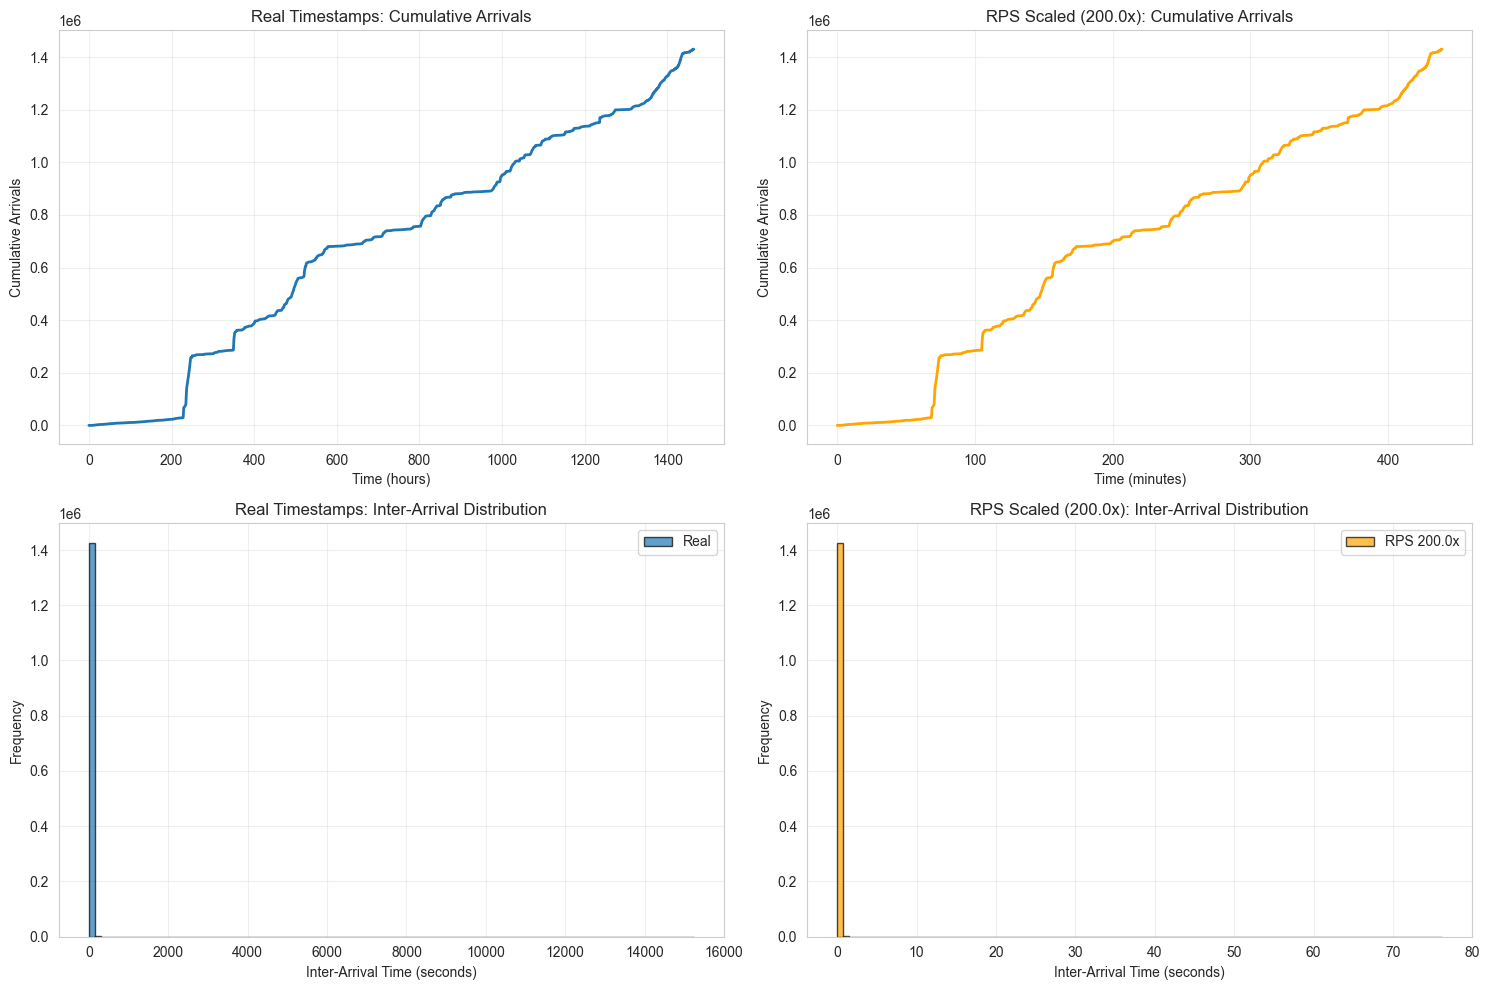

✓ Plot saved to plots/real_vs_rps_scaled_comparison.png


In [12]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Real timestamps - cumulative arrivals
axes[0, 0].plot(df_sorted['timestamp'] / 3600, np.arange(1, len(df_sorted) + 1), linewidth=2, label='Real')
axes[0, 0].set_xlabel('Time (hours)')
axes[0, 0].set_ylabel('Cumulative Arrivals')
axes[0, 0].set_title('Real Timestamps: Cumulative Arrivals')
axes[0, 0].grid(True, alpha=0.3)

# RPS-scaled timestamps - cumulative arrivals
axes[0, 1].plot(df_scaled['timestamp_scaled'] / 60, np.arange(1, len(df_scaled) + 1), linewidth=2, color='orange', label='RPS Scaled')
axes[0, 1].set_xlabel('Time (minutes)')
axes[0, 1].set_ylabel('Cumulative Arrivals')
axes[0, 1].set_title(f'RPS Scaled ({rps_scaling}x): Cumulative Arrivals')
axes[0, 1].grid(True, alpha=0.3)

# Inter-arrival time comparison
axes[1, 0].hist(inter_arrival, bins=100, alpha=0.7, label='Real', edgecolor='black')
axes[1, 0].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Real Timestamps: Inter-Arrival Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(inter_arrival_scaled, bins=100, alpha=0.7, color='orange', label=f'RPS {rps_scaling}x', edgecolor='black')
axes[1, 1].set_xlabel('Inter-Arrival Time (seconds)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'RPS Scaled ({rps_scaling}x): Inter-Arrival Distribution')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/real_vs_rps_scaled_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Plot saved to plots/real_vs_rps_scaled_comparison.png")

## 6. Summary Report

In [14]:
# Generate summary report
summary = f"""
================================================================================
BURSTGPT TIMESTAMP & ARRIVAL RATE ANALYSIS SUMMARY
================================================================================

Dataset: {len(df):,} requests
Time Range: {df_sorted['timestamp'].max():.2f}s ({df_sorted['timestamp'].max()/3600:.2f} hours)

INTER-ARRIVAL TIME STATISTICS:
  Mean: {inter_arrival.mean():.3f}s
  Median: {inter_arrival.median():.3f}s
  Std Dev: {inter_arrival.std():.3f}s
  Min: {inter_arrival.min():.6f}s
  Max: {inter_arrival.max():.3f}s
  P95: {inter_arrival.quantile(0.95):.3f}s
  P99: {inter_arrival.quantile(0.99):.3f}s

ARRIVAL RATE (REAL TIMESTAMPS):
  Average: {1/inter_arrival.mean():.6f} req/s
  Average: {(1/inter_arrival.mean())*60:.4f} req/min
  Average: {(1/inter_arrival.mean())*3600:.2f} req/hour

BURSTINESS ({window_size}s windows):
  Mean rate: {arrival_rates.mean():.6f} req/s
  Peak rate: {arrival_rates.max():.6f} req/s
  Min rate: {arrival_rates.min():.6f} req/s
  Coefficient of Variation: {arrival_rates.std() / arrival_rates.mean():.2f}
  Burst periods (>mean+2σ): {100 * num_bursts / len(arrival_rates):.1f}%
  Quiet periods (<mean-σ): {100 * num_quiet / len(arrival_rates):.1f}%

RPS SCALING COMPARISON (factor: {rps_scaling}x):
  Real duration: {df_sorted['timestamp'].max()/3600:.2f} hours
  Scaled duration: {df_scaled['timestamp_scaled'].max()/60:.2f} minutes
  Compression: {df_sorted['timestamp'].max() / df_scaled['timestamp_scaled'].max():.1f}x faster
  
  Real avg rate: {1/inter_arrival.mean():.6f} req/s
  Scaled avg rate: {1/inter_arrival_scaled.mean():.3f} req/s
  Rate increase: {(1/inter_arrival_scaled.mean()) / (1/inter_arrival.mean()):.1f}x higher

KEY INSIGHTS:
  ✓ Real timestamps preserve natural bursty patterns from Azure production
  ✓ Arrival rate is very low (~{1/inter_arrival.mean():.4f} req/s), not high-pressure
  ✓ Burstiness exists but overall load is manageable
  ✓ RPS scaling creates artificial high-pressure for stress testing
  ✓ Real timestamps better for realistic benchmarking
  ✓ RPS scaling better for finding scheduler breaking points

PLOTS GENERATED:
  1. plots/inter_arrival_time_analysis.png
  2. plots/arrival_rate_over_time.png
  3. plots/real_vs_rps_scaled_comparison.png

================================================================================
"""

print(summary)

# Save summary to file
with open('plots/timestamp_analysis_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print("\n✓ Summary saved to plots/timestamp_analysis_summary.txt")


BURSTGPT TIMESTAMP & ARRIVAL RATE ANALYSIS SUMMARY

Dataset: 1,429,737 requests
Time Range: 5269973.00s (1463.88 hours)

INTER-ARRIVAL TIME STATISTICS:
  Mean: 3.686s
  Median: 1.000s
  Std Dev: 48.957s
  Min: 0.000000s
  Max: 15240.000s
  P95: 12.000s
  P99: 52.000s

ARRIVAL RATE (REAL TIMESTAMPS):
  Average: 0.271299 req/s
  Average: 16.2779 req/min
  Average: 976.68 req/hour

BURSTINESS (60s windows):
  Mean rate: 0.271298 req/s
  Peak rate: 20.833333 req/s
  Min rate: 0.000000 req/s
  Coefficient of Variation: 2.91
  Burst periods (>mean+2σ): 3.4%
  Quiet periods (<mean-σ): 0.0%

RPS SCALING COMPARISON (factor: 200.0x):
  Real duration: 1463.88 hours
  Scaled duration: 439.16 minutes
  Compression: 200.0x faster

  Real avg rate: 0.271299 req/s
  Scaled avg rate: 54.260 req/s
  Rate increase: 200.0x higher

KEY INSIGHTS:
  ✓ Real timestamps preserve natural bursty patterns from Azure production
  ✓ Arrival rate is very low (~0.2713 req/s), not high-pressure
  ✓ Burstiness exists b